In [1]:
from functions import *
import numpy as np
import re
import time
import csv
import matplotlib.pyplot as plt

population_number: int = 60
iterations_number: int = 35 # numero di generazioni
p_mutation: float = 0.05    # probabilità di mutazione

results = []
    
for filename in os.scandir(os.getcwd() + '\instances'):
    if filename.is_file():
        print(filename.name)
        
        bench_data = []
        dictionary = {}
        file = open(os.getcwd() + '\\instances\\' + filename.name, "rt")
        with file as f:
            for line in f:
               (key, val) = line.split(':')
               dictionary[key] = val    
        file.close()
        
        n_jobs = int(dictionary['number of jobs'])
        n_machines = int(dictionary['number of machines'])
        best_upper_bound = int(dictionary['upper bound'])
 
        
        processing_times = re.findall('\[(.*?)\]', dictionary['processing times'])
        
        i = 1
        for machine_times in processing_times:
            list_times = machine_times.split(' ')
            list_times = [int(x) for x in list_times]
            bench_data.append(list_times)
            #print('machine' + str(i) + ': ')
            #print(list_times)
            i = i + 1
        
        processing_time = [] # tempi di esecuzione del job j sulla macchina i
        for i in range(n_jobs):
            temp = []
            for j in range(n_machines):
                temp.append(bench_data[j][i])
            #print('job' + str(i + 1) + ': ')
            #print(temp)
            processing_time.append(temp)


        
        start_time = time.time()
        # creazione popolazione
        population = initialize_population(population_number, n_jobs)
   

        for evaluation in range(iterations_number):
            print('---- creazione ' + str(evaluation) + ' generazione ----\n')
            parents = get_parents(population, processing_time, n_jobs, n_machines)
            childs = []
            # operatore di crossover per generare nuove sequenze di scheduling
            childs.append(crossover(parents))
        

            # operatore di mutazione
            mutated_childs = []
            for child in childs:
                r = np.random.rand()
                if r < p_mutation:
                    mutated_child = mutation(child)
                    mutated_childs.append(mutated_child)
                mutated_childs.append(child)

            if len(mutated_childs) > 0:
                update_population(population, mutated_childs, processing_time, n_jobs, n_machines)
            print('---- generazione ' + str(evaluation) + ' creata ----\n')
            
        makespans = []
        for individual in population:
            ind_makespan = (calc_makespan(individual, processing_time, n_jobs, n_machines), individual)
            makespans.append(ind_makespan)
        makespans.sort(key=lambda x: x[0])

        best_seq = makespans[0][1]
        best_makespan = makespans[0][0]
        end_time = time.time()
        
        for ms in makespans:
            print(ms)

        print(best_makespan)
        print(best_seq)
        print("--- %s secondi ---" % (end_time - start_time))
        
        #dic = [{'instance_dim':filename.name, 'result': best_makespan, 'execution_time':(end_time - start_time)}]
        results.append({'instance_dim':filename.name, 'result': best_makespan, 'upper_bound': best_upper_bound, 'execution_time':(end_time - start_time)})
        
    time.sleep(1)      

1_taillard_20x5.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.029958927277120077, [19, 14, 13, 7, 8, 15, 1, 6, 10, 3, 2, 16, 18, 0, 5, 12, 4, 11, 17, 9])
(0.041314327132157526, [18, 6, 11, 12, 4, 17, 14, 15, 16, 7, 0, 9, 1, 10, 13, 2, 5, 8, 3, 19])
(0.06402512684223242, [10, 15, 4, 13, 18, 2, 3, 14, 16, 17, 7, 8, 6, 19, 5, 1, 9, 0, 12, 11])
(0.06982362889586857, [11, 9, 8, 10, 6, 15, 1, 2, 17, 18, 19, 7, 13, 5, 3, 4, 14, 16, 0, 12])
(0.08733993718289441, [17, 2, 3, 10, 12, 0, 9, 14, 13, 5, 11, 16, 1, 6, 15, 19, 8, 4, 7, 18])
(0.11210437303696545, [12, 16, 1, 2, 10, 8, 13, 11, 4, 15, 5, 0, 9, 6, 17, 19, 3, 18, 7, 14])
(0.12418458564870742, [14, 19, 3, 2, 4, 18, 7, 15, 17, 13, 1, 12, 10, 9, 5, 8, 11, 6, 0, 16])
(0.137593621647741, [7, 19, 1, 0, 11, 12, 16, 17, 14, 15, 8, 13, 5, 10, 9, 2, 18, 3, 4, 6])
(0.1524522831601836, [17, 6, 4, 0, 12, 1, 14, 7, 8, 19, 18, 3, 13, 15, 2, 5, 16, 11, 10, 9])
(0.16429089151969076, [7, 15, 6, 16, 17, 2, 4, 1, 10, 11, 18, 12, 0,

2_taillard_20x10.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.013017390420014237, [13, 18, 19, 11, 17, 0, 4, 14, 3, 8, 15, 9, 12, 10, 2, 16, 6, 1, 5, 7])
(0.02878063663175023, [8, 6, 12, 11, 0, 2, 18, 3, 14, 13, 16, 19, 7, 15, 10, 5, 9, 17, 4, 1])
(0.04566256483270619, [12, 4, 10, 19, 5, 8, 17, 13, 6, 3, 9, 7, 16, 15, 0, 1, 18, 11, 14, 2])
(0.07139225058476559, [7, 2, 10, 3, 4, 5, 12, 19, 8, 1, 9, 17, 14, 11, 16, 13, 0, 18, 15, 6])
(0.09630834943557409, [7, 14, 12, 9, 11, 19, 17, 8, 18, 3, 1, 16, 2, 13, 6, 5, 0, 15, 4, 10])
(0.11156310383402827, [1, 13, 17, 3, 15, 2, 16, 9, 0, 14, 18, 10, 5, 4, 6, 19, 7, 12, 11, 8])
(0.13881826502593309, [13, 19, 11, 16, 12, 1, 14, 17, 0, 9, 3, 4, 10, 6, 15, 7, 18, 5, 8, 2])
(0.15203905217126004, [2, 12, 13, 8, 7, 19, 1, 10, 0, 6, 17, 3, 16, 5, 4, 14, 15, 11, 9, 18])
(0.1582426522932981, [9, 1, 18, 0, 17, 6, 10, 15, 5, 19, 8, 12, 11, 2, 7, 16, 4, 3, 13, 14])
(0.1765483575714431, [18, 0, 16, 2, 1, 4, 7, 19, 12, 14, 8, 13, 3,

---- generazione 27 creata ----

---- creazione 28 generazione ----

fitness cumulata per sequenza: 
(0.0010375596596804316, [8, 6, 12, 11, 0, 2, 18, 3, 14, 13, 16, 19, 7, 15, 10, 5, 9, 17, 4, 1])
(0.004357750570657813, [12, 4, 10, 19, 5, 8, 17, 13, 6, 3, 9, 7, 16, 15, 0, 1, 18, 11, 14, 2])
(0.025731479560074703, [7, 2, 10, 3, 4, 5, 12, 19, 8, 1, 9, 17, 14, 11, 16, 13, 0, 18, 15, 6])
(0.045445113094002905, [7, 14, 12, 9, 11, 19, 17, 8, 18, 3, 1, 16, 2, 13, 6, 5, 0, 15, 4, 10])
(0.045445113094002905, [1, 13, 17, 3, 15, 2, 16, 9, 0, 14, 18, 10, 5, 4, 6, 19, 7, 12, 11, 8])
(0.06993152106246109, [13, 19, 11, 16, 12, 1, 14, 17, 0, 9, 3, 4, 10, 6, 15, 7, 18, 5, 8, 2])
(0.07615687902054367, [18, 0, 16, 2, 1, 4, 7, 19, 12, 14, 8, 13, 3, 10, 5, 9, 17, 6, 11, 15])
(0.11143390744967836, [1, 17, 8, 14, 19, 3, 18, 4, 16, 2, 9, 5, 6, 13, 0, 11, 15, 7, 10, 12])
(0.13633533928200872, [12, 19, 8, 2, 13, 18, 14, 17, 3, 16, 1, 9, 5, 0, 11, 6, 10, 7, 4, 15])
(0.13882548246524176, [11, 7, 8, 9, 2, 14, 13, 

3_taillard_20x20.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.0110050022737608, [10, 19, 7, 6, 1, 0, 11, 13, 2, 16, 5, 15, 17, 8, 3, 4, 14, 9, 18, 12])
(0.021646202819463393, [10, 14, 2, 9, 0, 7, 11, 16, 6, 13, 3, 1, 18, 19, 12, 15, 5, 17, 4, 8])
(0.04056389267849022, [1, 3, 11, 12, 2, 9, 19, 7, 6, 14, 5, 4, 15, 10, 17, 13, 8, 0, 18, 16])
(0.049840836743974534, [6, 17, 9, 2, 3, 19, 16, 12, 10, 14, 1, 8, 5, 18, 0, 11, 7, 13, 15, 4])
(0.06530241018644839, [15, 18, 5, 3, 16, 1, 17, 4, 12, 19, 10, 0, 8, 14, 7, 2, 9, 6, 11, 13])
(0.08231014097316962, [13, 8, 15, 19, 16, 2, 11, 5, 6, 12, 7, 14, 3, 18, 1, 0, 17, 9, 10, 4])
(0.09831741700773079, [3, 11, 15, 16, 10, 14, 7, 2, 12, 6, 18, 1, 8, 17, 9, 5, 0, 13, 4, 19])
(0.1077762619372442, [1, 7, 14, 0, 17, 9, 4, 5, 16, 12, 13, 3, 19, 11, 2, 6, 15, 8, 18, 10])
(0.13360618462937698, [7, 14, 19, 9, 12, 1, 10, 4, 8, 5, 6, 15, 11, 17, 0, 3, 18, 2, 16, 13])
(0.1586175534333788, [16, 11, 8, 10, 6, 4, 13, 9, 2, 14, 3, 15, 5,

fitness cumulata per sequenza: 
(0.0018176310209027568, [10, 19, 7, 6, 1, 0, 11, 13, 2, 16, 5, 15, 17, 8, 3, 4, 14, 9, 18, 12])
(0.003029385034837928, [10, 14, 2, 9, 0, 7, 11, 16, 6, 13, 3, 1, 18, 19, 12, 15, 5, 17, 4, 8])
(0.01802484095728567, [1, 3, 11, 12, 2, 9, 19, 7, 6, 14, 5, 4, 15, 10, 17, 13, 8, 0, 18, 16])
(0.02726446531354135, [15, 18, 5, 3, 16, 1, 17, 4, 12, 19, 10, 0, 8, 14, 7, 2, 9, 6, 11, 13])
(0.03907906694940927, [13, 8, 15, 19, 16, 2, 11, 5, 6, 12, 7, 14, 3, 18, 1, 0, 17, 9, 10, 4])
(0.04922750681611633, [3, 11, 15, 16, 10, 14, 7, 2, 12, 6, 18, 1, 8, 17, 9, 5, 0, 13, 4, 19])
(0.0757346258709482, [7, 14, 19, 9, 12, 1, 10, 4, 8, 5, 6, 15, 11, 17, 0, 3, 18, 2, 16, 13])
(0.100878521660103, [16, 11, 8, 10, 6, 4, 13, 9, 2, 14, 3, 15, 5, 0, 7, 1, 12, 17, 18, 19])
(0.10633141472281127, [9, 1, 18, 10, 0, 14, 19, 12, 3, 8, 11, 5, 7, 6, 13, 15, 2, 4, 17, 16])
(0.13647379581944866, [4, 12, 15, 7, 3, 6, 14, 9, 2, 10, 17, 16, 0, 19, 1, 13, 18, 8, 11, 5])
(0.14525901242047864, [16, 1

---- generazione 31 creata ----

---- creazione 32 generazione ----

fitness cumulata per sequenza: 
(0.007100796674748874, [1, 3, 11, 12, 2, 9, 19, 7, 6, 14, 5, 4, 15, 10, 17, 13, 8, 0, 18, 16])
(0.007620367163145133, [15, 18, 5, 3, 16, 1, 17, 4, 12, 19, 10, 0, 8, 14, 7, 2, 9, 6, 11, 13])
(0.011084170419120194, [13, 8, 15, 19, 16, 2, 11, 5, 6, 12, 7, 14, 3, 18, 1, 0, 17, 9, 10, 4])
(0.012642881884308971, [3, 11, 15, 16, 10, 14, 7, 2, 12, 6, 18, 1, 8, 17, 9, 5, 0, 13, 4, 19])
(0.032906130931763075, [7, 14, 19, 9, 12, 1, 10, 4, 8, 5, 6, 15, 11, 17, 0, 3, 18, 2, 16, 13])
(0.0516106685140284, [16, 11, 8, 10, 6, 4, 13, 9, 2, 14, 3, 15, 5, 0, 7, 1, 12, 17, 18, 19])
(0.07603048146865259, [4, 12, 15, 7, 3, 6, 14, 9, 2, 10, 17, 16, 0, 19, 1, 13, 18, 8, 11, 5])
(0.07603048146865259, [16, 10, 14, 18, 5, 15, 3, 19, 6, 4, 1, 17, 7, 0, 11, 13, 2, 8, 12, 9])
(0.0891929338413578, [11, 19, 9, 2, 6, 5, 4, 12, 8, 18, 7, 15, 10, 14, 13, 0, 3, 16, 17, 1])
(0.0891929338413578, [1, 16, 15, 5, 14, 0, 8, 7, 1

4_taillard_50x5.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.016584184479309254, [32, 40, 10, 19, 46, 6, 44, 28, 24, 48, 35, 17, 45, 21, 20, 23, 7, 36, 4, 0, 38, 13, 37, 49, 3, 41, 9, 42, 47, 39, 31, 11, 12, 5, 33, 8, 43, 22, 2, 14, 18, 29, 1, 27, 25, 30, 26, 15, 34, 16])
(0.04090765504896283, [2, 16, 29, 34, 32, 31, 3, 8, 9, 39, 1, 42, 20, 17, 37, 38, 26, 6, 45, 14, 23, 30, 40, 4, 25, 12, 35, 19, 7, 28, 41, 18, 22, 43, 47, 48, 5, 24, 13, 15, 44, 10, 49, 27, 36, 46, 33, 21, 0, 11])
(0.058386859008107826, [12, 30, 29, 48, 23, 1, 49, 10, 5, 35, 27, 2, 13, 32, 36, 22, 47, 43, 24, 15, 0, 39, 14, 17, 21, 20, 28, 31, 3, 40, 38, 37, 26, 41, 8, 7, 18, 44, 34, 33, 11, 6, 9, 46, 19, 4, 42, 25, 16, 45])
(0.0752869327155944, [48, 5, 31, 20, 30, 42, 46, 23, 27, 41, 10, 8, 9, 36, 2, 22, 29, 1, 26, 4, 7, 45, 19, 17, 16, 24, 49, 13, 33, 21, 11, 39, 15, 47, 12, 28, 32, 14, 40, 0, 18, 34, 6, 43, 3, 25, 35, 38, 37, 44])
(0.09055491207749816, [33, 36, 6, 7, 9, 47, 38, 17, 39, 

fitness cumulata per sequenza: 
(0.008262591963780418, [32, 40, 10, 19, 46, 6, 44, 28, 24, 48, 35, 17, 45, 21, 20, 23, 7, 36, 4, 0, 38, 13, 37, 49, 3, 41, 9, 42, 47, 39, 31, 11, 12, 5, 33, 8, 43, 22, 2, 14, 18, 29, 1, 27, 25, 30, 26, 15, 34, 16])
(0.033163554046406335, [2, 16, 29, 34, 32, 31, 3, 8, 9, 39, 1, 42, 20, 17, 37, 38, 26, 6, 45, 14, 23, 30, 40, 4, 25, 12, 35, 19, 7, 28, 41, 18, 22, 43, 47, 48, 5, 24, 13, 15, 44, 10, 49, 27, 36, 46, 33, 21, 0, 11])
(0.043350311262026035, [12, 30, 29, 48, 23, 1, 49, 10, 5, 35, 27, 2, 13, 32, 36, 22, 47, 43, 24, 15, 0, 39, 14, 17, 21, 20, 28, 31, 3, 40, 38, 37, 26, 41, 8, 7, 18, 44, 34, 33, 11, 6, 9, 46, 19, 4, 42, 25, 16, 45])
(0.05229202037351443, [48, 5, 31, 20, 30, 42, 46, 23, 27, 41, 10, 8, 9, 36, 2, 22, 29, 1, 26, 4, 7, 45, 19, 17, 16, 24, 49, 13, 33, 21, 11, 39, 15, 47, 12, 28, 32, 14, 40, 0, 18, 34, 6, 43, 3, 25, 35, 38, 37, 44])
(0.057724957555178265, [33, 36, 6, 7, 9, 47, 38, 17, 39, 40, 42, 46, 34, 49, 43, 32, 4, 16, 30, 11, 37, 8, 27

---- generazione 33 creata ----

---- creazione 34 generazione ----

fitness cumulata per sequenza: 
(0.021101466626758457, [2, 16, 29, 34, 32, 31, 3, 8, 9, 39, 1, 42, 20, 17, 37, 38, 26, 6, 45, 14, 23, 30, 40, 4, 25, 12, 35, 19, 7, 28, 41, 18, 22, 43, 47, 48, 5, 24, 13, 15, 44, 10, 49, 27, 36, 46, 33, 21, 0, 11])
(0.022747680335228972, [12, 30, 29, 48, 23, 1, 49, 10, 5, 35, 27, 2, 13, 32, 36, 22, 47, 43, 24, 15, 0, 39, 14, 17, 21, 20, 28, 31, 3, 40, 38, 37, 26, 41, 8, 7, 18, 44, 34, 33, 11, 6, 9, 46, 19, 4, 42, 25, 16, 45])
(0.022747680335228972, [48, 5, 31, 20, 30, 42, 46, 23, 27, 41, 10, 8, 9, 36, 2, 22, 29, 1, 26, 4, 7, 45, 19, 17, 16, 24, 49, 13, 33, 21, 11, 39, 15, 47, 12, 28, 32, 14, 40, 0, 18, 34, 6, 43, 3, 25, 35, 38, 37, 44])
(0.024693205627057766, [46, 16, 31, 18, 12, 40, 22, 32, 24, 26, 1, 15, 47, 30, 23, 21, 37, 42, 5, 3, 6, 38, 19, 44, 17, 2, 48, 25, 41, 11, 28, 10, 4, 13, 45, 29, 27, 7, 33, 36, 34, 35, 49, 39, 20, 0, 8, 14, 9, 43])
(0.05642023346303502, [37, 31, 35, 44, 

5_taillard_50x10.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.01833273921678464, [41, 42, 22, 0, 31, 17, 45, 35, 11, 32, 39, 25, 23, 21, 12, 2, 36, 20, 1, 49, 33, 10, 28, 30, 27, 8, 15, 34, 3, 48, 43, 37, 4, 47, 9, 7, 29, 26, 19, 44, 16, 24, 5, 18, 14, 6, 46, 40, 38, 13])
(0.038906146560065184, [48, 34, 36, 44, 0, 37, 10, 31, 9, 21, 20, 16, 33, 47, 12, 24, 7, 23, 4, 3, 26, 22, 30, 27, 15, 45, 5, 6, 38, 13, 46, 32, 18, 25, 49, 8, 11, 17, 41, 19, 14, 1, 40, 28, 43, 2, 42, 39, 29, 35])
(0.053826959311503796, [19, 32, 20, 9, 47, 39, 36, 29, 44, 40, 48, 0, 6, 41, 7, 21, 45, 22, 15, 33, 17, 24, 46, 27, 3, 1, 25, 43, 28, 10, 5, 23, 35, 34, 12, 38, 26, 14, 37, 13, 30, 16, 11, 8, 31, 49, 42, 18, 4, 2])
(0.07042827315781433, [37, 14, 30, 29, 40, 4, 44, 15, 42, 48, 28, 13, 35, 34, 5, 47, 10, 8, 43, 33, 24, 41, 9, 31, 7, 23, 32, 45, 20, 18, 25, 22, 36, 1, 16, 0, 17, 11, 38, 39, 3, 49, 21, 6, 26, 27, 46, 19, 12, 2])
(0.09415898558843, [45, 44, 8, 43, 3, 29, 35, 25, 32, 

fitness cumulata per sequenza: 
(0.015959048479373683, [41, 42, 22, 0, 31, 17, 45, 35, 11, 32, 39, 25, 23, 21, 12, 2, 36, 20, 1, 49, 33, 10, 28, 30, 27, 8, 15, 34, 3, 48, 43, 37, 4, 47, 9, 7, 29, 26, 19, 44, 16, 24, 5, 18, 14, 6, 46, 40, 38, 13])
(0.038542607648298706, [48, 34, 36, 44, 0, 37, 10, 31, 9, 21, 20, 16, 33, 47, 12, 24, 7, 23, 4, 3, 26, 22, 30, 27, 15, 45, 5, 6, 38, 13, 46, 32, 18, 25, 49, 8, 11, 17, 41, 19, 14, 1, 40, 28, 43, 2, 42, 39, 29, 35])
(0.044414333032219214, [19, 32, 20, 9, 47, 39, 36, 29, 44, 40, 48, 0, 6, 41, 7, 21, 45, 22, 15, 33, 17, 24, 46, 27, 3, 1, 25, 43, 28, 10, 5, 23, 35, 34, 12, 38, 26, 14, 37, 13, 30, 16, 11, 8, 31, 49, 42, 18, 4, 2])
(0.05525444143330322, [37, 14, 30, 29, 40, 4, 44, 15, 42, 48, 28, 13, 35, 34, 5, 47, 10, 8, 43, 33, 24, 41, 9, 31, 7, 23, 32, 45, 20, 18, 25, 22, 36, 1, 16, 0, 17, 11, 38, 39, 3, 49, 21, 6, 26, 27, 46, 19, 12, 2])
(0.08717253839205058, [45, 44, 8, 43, 3, 29, 35, 25, 32, 5, 33, 7, 48, 12, 18, 24, 6, 1, 9, 13, 10, 19, 14, 3

fitness cumulata per sequenza: 
(0.012522361359570662, [41, 42, 22, 0, 31, 17, 45, 35, 11, 32, 39, 25, 23, 21, 12, 2, 36, 20, 1, 49, 33, 10, 28, 30, 27, 8, 15, 34, 3, 48, 43, 37, 4, 47, 9, 7, 29, 26, 19, 44, 16, 24, 5, 18, 14, 6, 46, 40, 38, 13])
(0.03220035778175313, [48, 34, 36, 44, 0, 37, 10, 31, 9, 21, 20, 16, 33, 47, 12, 24, 7, 23, 4, 3, 26, 22, 30, 27, 15, 45, 5, 6, 38, 13, 46, 32, 18, 25, 49, 8, 11, 17, 41, 19, 14, 1, 40, 28, 43, 2, 42, 39, 29, 35])
(0.03382663847780127, [19, 32, 20, 9, 47, 39, 36, 29, 44, 40, 48, 0, 6, 41, 7, 21, 45, 22, 15, 33, 17, 24, 46, 27, 3, 1, 25, 43, 28, 10, 5, 23, 35, 34, 12, 38, 26, 14, 37, 13, 30, 16, 11, 8, 31, 49, 42, 18, 4, 2])
(0.04081964547080826, [37, 14, 30, 29, 40, 4, 44, 15, 42, 48, 28, 13, 35, 34, 5, 47, 10, 8, 43, 33, 24, 41, 9, 31, 7, 23, 32, 45, 20, 18, 25, 22, 36, 1, 16, 0, 17, 11, 38, 39, 3, 49, 21, 6, 26, 27, 46, 19, 12, 2])
(0.07058058220848919, [45, 44, 8, 43, 3, 29, 35, 25, 32, 5, 33, 7, 48, 12, 18, 24, 6, 1, 9, 13, 10, 19, 14, 36,

fitness cumulata per sequenza: 
(0.007588075880758808, [41, 42, 22, 0, 31, 17, 45, 35, 11, 32, 39, 25, 23, 21, 12, 2, 36, 20, 1, 49, 33, 10, 28, 30, 27, 8, 15, 34, 3, 48, 43, 37, 4, 47, 9, 7, 29, 26, 19, 44, 16, 24, 5, 18, 14, 6, 46, 40, 38, 13])
(0.023125564588979224, [48, 34, 36, 44, 0, 37, 10, 31, 9, 21, 20, 16, 33, 47, 12, 24, 7, 23, 4, 3, 26, 22, 30, 27, 15, 45, 5, 6, 38, 13, 46, 32, 18, 25, 49, 8, 11, 17, 41, 19, 14, 1, 40, 28, 43, 2, 42, 39, 29, 35])
(0.024570912375790423, [37, 14, 30, 29, 40, 4, 44, 15, 42, 48, 28, 13, 35, 34, 5, 47, 10, 8, 43, 33, 24, 41, 9, 31, 7, 23, 32, 45, 20, 18, 25, 22, 36, 1, 16, 0, 17, 11, 38, 39, 3, 49, 21, 6, 26, 27, 46, 19, 12, 2])
(0.05130984643179765, [45, 44, 8, 43, 3, 29, 35, 25, 32, 5, 33, 7, 48, 12, 18, 24, 6, 1, 9, 13, 10, 19, 14, 36, 37, 42, 2, 38, 47, 40, 0, 27, 26, 4, 46, 39, 23, 11, 15, 41, 17, 28, 22, 34, 20, 31, 49, 21, 30, 16])
(0.06558265582655827, [41, 35, 25, 46, 48, 45, 34, 14, 26, 39, 17, 10, 30, 13, 0, 42, 29, 32, 8, 40, 22, 2, 3

6_taillard_50x20.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.021300374728814672, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.044310038787719414, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.07724672934060876, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.08572743409374795, [35, 23, 10, 37, 20, 44, 28, 3, 6, 15, 39, 18, 32, 12, 41, 22, 38, 46, 42, 4, 2, 25, 19, 16, 49, 24, 17, 8, 33, 43, 29, 9, 48, 7, 27, 31, 14, 5, 36, 26, 45, 0, 40, 21, 13, 47, 1, 11, 30, 34])
(0.09315626848990861, [35, 25, 45, 38, 48, 24, 49, 26,

fitness cumulata per sequenza: 
(0.02101020495669325, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.04425006431695395, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.08043907040562559, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.08472686733556299, [35, 23, 10, 37, 20, 44, 28, 3, 6, 15, 39, 18, 32, 12, 41, 22, 38, 46, 42, 4, 2, 25, 19, 16, 49, 24, 17, 8, 33, 43, 29, 9, 48, 7, 27, 31, 14, 5, 36, 26, 45, 0, 40, 21, 13, 47, 1, 11, 30, 34])
(0.08764256924792042, [35, 25, 45, 38, 48, 24, 49, 26, 46, 40, 10, 37, 15, 47, 4, 33, 14, 29, 2, 21, 41, 23, 5, 

fitness cumulata per sequenza: 
(0.01967510846534154, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.04197356472606195, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.07950761779840582, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.07950761779840582, [35, 23, 10, 37, 20, 44, 28, 3, 6, 15, 39, 18, 32, 12, 41, 22, 38, 46, 42, 4, 2, 25, 19, 16, 49, 24, 17, 8, 33, 43, 29, 9, 48, 7, 27, 31, 14, 5, 36, 26, 45, 0, 40, 21, 13, 47, 1, 11, 30, 34])
(0.09847644031883765, [4, 8, 13, 28, 22, 0, 46, 30, 3, 43, 37, 47, 26, 40, 48, 16, 23, 2, 29, 19, 49, 14, 44, 21

[23, 0, 20, 24, 4, 28, 11, 40, 22, 2, 14, 7, 30, 18, 5, 26, 49, 15, 41, 16, 37, 38, 39, 27, 25, 31, 10, 47, 35, 13, 42, 44, 45, 33, 32, 17, 43, 48, 46, 34, 1, 9, 29, 3, 21, 6, 8, 36, 12, 19]


---- generazione 12 creata ----

---- creazione 13 generazione ----

fitness cumulata per sequenza: 
(0.017873941674506115, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.038805268109125116, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.07749294449670743, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.09454374412041393, [4, 8, 13, 28, 22, 0, 46, 30, 3, 43, 37,

fitness cumulata per sequenza: 
(0.016387602422515142, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.03586272414202589, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.07326920793254958, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.08882555515971975, [4, 8, 13, 28, 22, 0, 46, 30, 3, 43, 37, 47, 26, 40, 48, 16, 23, 2, 29, 19, 49, 14, 44, 21, 34, 12, 36, 17, 32, 25, 42, 5, 31, 41, 9, 20, 33, 7, 10, 1, 39, 24, 38, 6, 15, 35, 27, 18, 45, 11])
(0.10153188457427859, [8, 12, 27, 44, 1, 5, 29, 19, 18, 15, 49, 39, 3, 17, 0, 25, 45, 46, 9, 23, 35, 38, 28, 33

(0.705928338762215, [1, 38, 25, 5, 0, 3, 33, 40, 22, 43, 11, 14, 17, 16, 45, 4, 28, 34, 30, 19, 13, 27, 24, 35, 26, 20, 15, 47, 29, 32, 18, 31, 2, 6, 7, 39, 36, 44, 23, 48, 10, 46, 49, 21, 12, 42, 37, 9, 41, 8])
(0.7227361563517916, [11, 4, 24, 29, 44, 21, 19, 46, 41, 8, 34, 9, 13, 47, 5, 1, 45, 0, 31, 18, 43, 25, 17, 40, 48, 12, 27, 6, 30, 39, 16, 35, 3, 37, 20, 7, 36, 15, 38, 10, 32, 26, 33, 49, 22, 2, 23, 42, 14, 28])
(0.7428013029315961, [23, 0, 20, 24, 4, 28, 11, 40, 22, 2, 14, 7, 30, 18, 5, 26, 49, 15, 41, 16, 37, 38, 39, 27, 25, 31, 10, 47, 35, 13, 42, 44, 45, 33, 32, 17, 43, 48, 46, 34, 1, 9, 29, 3, 21, 6, 8, 36, 12, 19])
(0.7661237785016287, [0, 20, 24, 28, 2, 7, 5, 41, 16, 37, 38, 39, 40, 15, 4, 19, 13, 31, 22, 43, 11, 18, 14, 23, 47, 48, 26, 17, 34, 10, 46, 49, 32, 21, 30, 12, 44, 45, 27, 25, 35, 42, 33, 1, 9, 29, 3, 6, 8, 36])
(0.7867100977198697, [22, 24, 2, 19, 23, 28, 14, 4, 1, 0, 40, 12, 30, 18, 5, 26, 49, 15, 41, 16, 37, 38, 39, 27, 25, 31, 10, 47, 35, 13, 42, 44, 45, 

fitness cumulata per sequenza: 
(0.010371650821089023, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.024488619994237973, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.060357245750504177, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.06972054163065398, [4, 8, 13, 28, 22, 0, 46, 30, 3, 43, 37, 47, 26, 40, 48, 16, 23, 2, 29, 19, 49, 14, 44, 21, 34, 12, 36, 17, 32, 25, 42, 5, 31, 41, 9, 20, 33, 7, 10, 1, 39, 24, 38, 6, 15, 35, 27, 18, 45, 11])
(0.0756266205704408, [8, 12, 27, 44, 1, 5, 29, 19, 18, 15, 49, 39, 3, 17, 0, 25, 45, 46, 9, 23, 35, 38, 28, 3

fitness cumulata per sequenza: 
(0.007969924812030075, [26, 11, 39, 21, 47, 7, 45, 23, 12, 43, 24, 48, 0, 19, 38, 29, 15, 2, 33, 28, 22, 34, 42, 6, 37, 14, 13, 17, 49, 5, 25, 41, 10, 46, 44, 16, 40, 8, 18, 36, 3, 20, 30, 4, 32, 9, 31, 27, 1, 35])
(0.019849624060150377, [21, 8, 19, 11, 42, 23, 10, 7, 43, 25, 35, 31, 24, 1, 38, 30, 6, 39, 34, 36, 33, 14, 45, 47, 12, 49, 17, 13, 18, 41, 27, 15, 28, 16, 37, 5, 48, 40, 20, 44, 46, 26, 9, 4, 22, 2, 32, 29, 0, 3])
(0.05443609022556391, [43, 13, 39, 32, 25, 10, 38, 48, 6, 49, 20, 7, 18, 35, 26, 11, 46, 31, 45, 33, 14, 4, 47, 9, 0, 12, 22, 1, 23, 28, 30, 5, 42, 2, 21, 15, 36, 37, 16, 27, 17, 3, 19, 29, 44, 41, 8, 24, 34, 40])
(0.06135338345864662, [4, 8, 13, 28, 22, 0, 46, 30, 3, 43, 37, 47, 26, 40, 48, 16, 23, 2, 29, 19, 49, 14, 44, 21, 34, 12, 36, 17, 32, 25, 42, 5, 31, 41, 9, 20, 33, 7, 10, 1, 39, 24, 38, 6, 15, 35, 27, 18, 45, 11])
(0.06466165413533835, [8, 12, 27, 44, 1, 5, 29, 19, 18, 15, 49, 39, 3, 17, 0, 25, 45, 46, 9, 23, 35, 38, 28, 3

7_taillard_100x5.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.018654434250764525, [66, 76, 87, 68, 96, 54, 24, 72, 26, 45, 25, 56, 46, 51, 92, 27, 59, 14, 73, 78, 47, 84, 15, 31, 58, 57, 38, 95, 4, 30, 65, 88, 32, 74, 34, 37, 97, 64, 17, 23, 35, 61, 99, 98, 33, 90, 16, 63, 70, 12, 6, 40, 1, 85, 82, 8, 20, 2, 50, 94, 79, 69, 81, 75, 44, 89, 48, 83, 11, 29, 60, 53, 67, 49, 18, 21, 13, 55, 36, 3, 77, 86, 19, 43, 42, 41, 10, 5, 9, 93, 0, 22, 80, 71, 52, 39, 28, 7, 62, 91])
(0.03682830930537353, [63, 0, 13, 48, 43, 51, 69, 1, 31, 58, 92, 55, 95, 10, 89, 93, 11, 50, 47, 90, 88, 25, 39, 16, 9, 59, 33, 14, 12, 94, 60, 82, 21, 65, 36, 15, 32, 30, 5, 81, 34, 27, 23, 86, 78, 42, 41, 3, 80, 17, 97, 18, 70, 20, 66, 24, 44, 35, 61, 19, 29, 26, 22, 91, 2, 83, 46, 71, 85, 28, 54, 75, 52, 99, 56, 38, 77, 45, 62, 68, 8, 96, 67, 4, 53, 84, 57, 98, 72, 64, 73, 6, 74, 76, 49, 79, 87, 40, 7, 37])
(0.05356050677151595, [16, 86, 12, 53, 57, 26, 80, 66, 9, 94, 33, 88, 8, 92, 97, 96

fitness cumulata per sequenza: 
(0.016899067319235385, [66, 76, 87, 68, 96, 54, 24, 72, 26, 45, 25, 56, 46, 51, 92, 27, 59, 14, 73, 78, 47, 84, 15, 31, 58, 57, 38, 95, 4, 30, 65, 88, 32, 74, 34, 37, 97, 64, 17, 23, 35, 61, 99, 98, 33, 90, 16, 63, 70, 12, 6, 40, 1, 85, 82, 8, 20, 2, 50, 94, 79, 69, 81, 75, 44, 89, 48, 83, 11, 29, 60, 53, 67, 49, 18, 21, 13, 55, 36, 3, 77, 86, 19, 43, 42, 41, 10, 5, 9, 93, 0, 22, 80, 71, 52, 39, 28, 7, 62, 91])
(0.03278234370671346, [63, 0, 13, 48, 43, 51, 69, 1, 31, 58, 92, 55, 95, 10, 89, 93, 11, 50, 47, 90, 88, 25, 39, 16, 9, 59, 33, 14, 12, 94, 60, 82, 21, 65, 36, 15, 32, 30, 5, 81, 34, 27, 23, 86, 78, 42, 41, 3, 80, 17, 97, 18, 70, 20, 66, 24, 44, 35, 61, 19, 29, 26, 22, 91, 2, 83, 46, 71, 85, 28, 54, 75, 52, 99, 56, 38, 77, 45, 62, 68, 8, 96, 67, 4, 53, 84, 57, 98, 72, 64, 73, 6, 74, 76, 49, 79, 87, 40, 7, 37])
(0.04561824729891957, [16, 86, 12, 53, 57, 26, 80, 66, 9, 94, 33, 88, 8, 92, 97, 96, 67, 13, 30, 22, 56, 28, 36, 11, 0, 49, 54, 98, 29, 10,

fitness cumulata per sequenza: 
(0.014404938836172401, [66, 76, 87, 68, 96, 54, 24, 72, 26, 45, 25, 56, 46, 51, 92, 27, 59, 14, 73, 78, 47, 84, 15, 31, 58, 57, 38, 95, 4, 30, 65, 88, 32, 74, 34, 37, 97, 64, 17, 23, 35, 61, 99, 98, 33, 90, 16, 63, 70, 12, 6, 40, 1, 85, 82, 8, 20, 2, 50, 94, 79, 69, 81, 75, 44, 89, 48, 83, 11, 29, 60, 53, 67, 49, 18, 21, 13, 55, 36, 3, 77, 86, 19, 43, 42, 41, 10, 5, 9, 93, 0, 22, 80, 71, 52, 39, 28, 7, 62, 91])
(0.027552303646964673, [63, 0, 13, 48, 43, 51, 69, 1, 31, 58, 92, 55, 95, 10, 89, 93, 11, 50, 47, 90, 88, 25, 39, 16, 9, 59, 33, 14, 12, 94, 60, 82, 21, 65, 36, 15, 32, 30, 5, 81, 34, 27, 23, 86, 78, 42, 41, 3, 80, 17, 97, 18, 70, 20, 66, 24, 44, 35, 61, 19, 29, 26, 22, 91, 2, 83, 46, 71, 85, 28, 54, 75, 52, 99, 56, 38, 77, 45, 62, 68, 8, 96, 67, 4, 53, 84, 57, 98, 72, 64, 73, 6, 74, 76, 49, 79, 87, 40, 7, 37])
(0.03692694638161655, [16, 86, 12, 53, 57, 26, 80, 66, 9, 94, 33, 88, 8, 92, 97, 96, 67, 13, 30, 22, 56, 28, 36, 11, 0, 49, 54, 98, 29, 10

fitness cumulata per sequenza: 
(0.007446520444083401, [66, 76, 87, 68, 96, 54, 24, 72, 26, 45, 25, 56, 46, 51, 92, 27, 59, 14, 73, 78, 47, 84, 15, 31, 58, 57, 38, 95, 4, 30, 65, 88, 32, 74, 34, 37, 97, 64, 17, 23, 35, 61, 99, 98, 33, 90, 16, 63, 70, 12, 6, 40, 1, 85, 82, 8, 20, 2, 50, 94, 79, 69, 81, 75, 44, 89, 48, 83, 11, 29, 60, 53, 67, 49, 18, 21, 13, 55, 36, 3, 77, 86, 19, 43, 42, 41, 10, 5, 9, 93, 0, 22, 80, 71, 52, 39, 28, 7, 62, 91])
(0.013403736799350122, [63, 0, 13, 48, 43, 51, 69, 1, 31, 58, 92, 55, 95, 10, 89, 93, 11, 50, 47, 90, 88, 25, 39, 16, 9, 59, 33, 14, 12, 94, 60, 82, 21, 65, 36, 15, 32, 30, 5, 81, 34, 27, 23, 86, 78, 42, 41, 3, 80, 17, 97, 18, 70, 20, 66, 24, 44, 35, 61, 19, 29, 26, 22, 91, 2, 83, 46, 71, 85, 28, 54, 75, 52, 99, 56, 38, 77, 45, 62, 68, 8, 96, 67, 4, 53, 84, 57, 98, 72, 64, 73, 6, 74, 76, 49, 79, 87, 40, 7, 37])
(0.014893040888166802, [16, 86, 12, 53, 57, 26, 80, 66, 9, 94, 33, 88, 8, 92, 97, 96, 67, 13, 30, 22, 56, 28, 36, 11, 0, 49, 54, 98, 29, 1

8_taillard_100x10.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.0, [93, 2, 74, 58, 90, 77, 63, 21, 51, 52, 35, 89, 24, 28, 36, 16, 54, 14, 40, 1, 43, 25, 73, 97, 18, 83, 76, 32, 37, 38, 9, 81, 39, 29, 53, 70, 11, 95, 6, 59, 87, 47, 96, 4, 49, 98, 71, 69, 62, 26, 22, 30, 15, 50, 33, 66, 85, 44, 8, 0, 88, 82, 12, 61, 56, 84, 46, 45, 99, 7, 94, 20, 92, 65, 64, 57, 78, 80, 3, 5, 72, 31, 48, 60, 42, 67, 19, 23, 55, 34, 41, 91, 13, 86, 68, 27, 75, 17, 79, 10])
(0.016451788632649355, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.03784274559651353, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 2

---- generazione 5 creata ----

---- creazione 6 generazione ----

fitness cumulata per sequenza: 
(0.014364640883977901, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.03946329913180742, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 25, 72, 88, 79, 56, 90, 48, 84, 53, 8, 31, 67, 76, 82, 35, 36, 3, 46, 55, 16, 68, 83, 13, 30, 39, 54, 20, 14, 75, 64, 23, 99, 59, 94, 87, 96, 65, 85, 86, 29, 32, 5, 74, 44, 22, 73, 37, 10, 18, 77, 45, 57, 63, 61, 21, 92, 17, 9, 15, 34, 42, 2, 49, 33, 19, 6, 58, 27, 1, 28, 80, 60, 95, 98, 47, 78, 24, 11, 97, 43, 7])
(0.05217048145224941, [73, 44, 61, 78, 30, 65, 15, 21, 11, 42, 68, 71, 5

fitness cumulata per sequenza: 
(0.010828091162215118, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.0356811384964422, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 25, 72, 88, 79, 56, 90, 48, 84, 53, 8, 31, 67, 76, 82, 35, 36, 3, 46, 55, 16, 68, 83, 13, 30, 39, 54, 20, 14, 75, 64, 23, 99, 59, 94, 87, 96, 65, 85, 86, 29, 32, 5, 74, 44, 22, 73, 37, 10, 18, 77, 45, 57, 63, 61, 21, 92, 17, 9, 15, 34, 42, 2, 49, 33, 19, 6, 58, 27, 1, 28, 80, 60, 95, 98, 47, 78, 24, 11, 97, 43, 7])
(0.04434361142621429, [73, 44, 61, 78, 30, 65, 15, 21, 11, 42, 68, 71, 59, 1, 38, 76, 28, 46, 99, 26, 96, 58, 14, 32, 49, 80, 45, 50, 63, 98

---- generazione 17 creata ----

---- creazione 18 generazione ----

fitness cumulata per sequenza: 
(0.008914421553090333, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.031299524564183834, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 25, 72, 88, 79, 56, 90, 48, 84, 53, 8, 31, 67, 76, 82, 35, 36, 3, 46, 55, 16, 68, 83, 13, 30, 39, 54, 20, 14, 75, 64, 23, 99, 59, 94, 87, 96, 65, 85, 86, 29, 32, 5, 74, 44, 22, 73, 37, 10, 18, 77, 45, 57, 63, 61, 21, 92, 17, 9, 15, 34, 42, 2, 49, 33, 19, 6, 58, 27, 1, 28, 80, 60, 95, 98, 47, 78, 24, 11, 97, 43, 7])
(0.03813391442155309, [73, 44, 61, 78, 30, 65, 15, 21, 11, 42, 68, 71

---- generazione 21 creata ----

---- creazione 22 generazione ----

fitness cumulata per sequenza: 
(0.006581696615127455, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.02737150020894275, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 25, 72, 88, 79, 56, 90, 48, 84, 53, 8, 31, 67, 76, 82, 35, 36, 3, 46, 55, 16, 68, 83, 13, 30, 39, 54, 20, 14, 75, 64, 23, 99, 59, 94, 87, 96, 65, 85, 86, 29, 32, 5, 74, 44, 22, 73, 37, 10, 18, 77, 45, 57, 63, 61, 21, 92, 17, 9, 15, 34, 42, 2, 49, 33, 19, 6, 58, 27, 1, 28, 80, 60, 95, 98, 47, 78, 24, 11, 97, 43, 7])
(0.03175929795236105, [73, 44, 61, 78, 30, 65, 15, 21, 11, 42, 68, 71,

fitness cumulata per sequenza: 
(0.0047257940433014615, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.024398285525881965, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 25, 72, 88, 79, 56, 90, 48, 84, 53, 8, 31, 67, 76, 82, 35, 36, 3, 46, 55, 16, 68, 83, 13, 30, 39, 54, 20, 14, 75, 64, 23, 99, 59, 94, 87, 96, 65, 85, 86, 29, 32, 5, 74, 44, 22, 73, 37, 10, 18, 77, 45, 57, 63, 61, 21, 92, 17, 9, 15, 34, 42, 2, 49, 33, 19, 6, 58, 27, 1, 28, 80, 60, 95, 98, 47, 78, 24, 11, 97, 43, 7])
(0.026816133641059458, [73, 44, 61, 78, 30, 65, 15, 21, 11, 42, 68, 71, 59, 1, 38, 76, 28, 46, 99, 26, 96, 58, 14, 32, 49, 80, 45, 50, 63

fitness cumulata per sequenza: 
(0.002049674463467567, [53, 30, 81, 0, 82, 70, 23, 45, 54, 83, 1, 33, 40, 94, 20, 3, 13, 86, 10, 19, 89, 64, 90, 18, 7, 5, 88, 62, 71, 52, 37, 99, 92, 48, 85, 16, 46, 11, 63, 47, 56, 59, 69, 12, 78, 50, 98, 21, 6, 73, 68, 91, 8, 74, 80, 27, 49, 93, 57, 34, 22, 76, 84, 55, 36, 61, 41, 24, 65, 75, 77, 44, 15, 35, 79, 28, 25, 42, 87, 29, 60, 97, 2, 72, 31, 95, 39, 51, 43, 17, 38, 58, 32, 4, 14, 9, 67, 26, 66, 96])
(0.02049674463467567, [26, 91, 51, 0, 66, 81, 41, 70, 4, 12, 40, 50, 71, 69, 38, 89, 52, 93, 62, 25, 72, 88, 79, 56, 90, 48, 84, 53, 8, 31, 67, 76, 82, 35, 36, 3, 46, 55, 16, 68, 83, 13, 30, 39, 54, 20, 14, 75, 64, 23, 99, 59, 94, 87, 96, 65, 85, 86, 29, 32, 5, 74, 44, 22, 73, 37, 10, 18, 77, 45, 57, 63, 61, 21, 92, 17, 9, 15, 34, 42, 2, 49, 33, 19, 6, 58, 27, 1, 28, 80, 60, 95, 98, 47, 78, 24, 11, 97, 43, 7])
(0.042681456474559926, [96, 26, 67, 90, 77, 59, 49, 55, 69, 31, 8, 98, 88, 4, 40, 36, 15, 28, 20, 75, 9, 63, 58, 22, 60, 29, 51, 83, 41, 12

9_taillard_100x20.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.025688857797986863, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03925226380630368, [86, 61, 94, 27, 78, 40, 44, 80, 72, 1, 20, 38, 60, 71, 50, 5, 34, 4, 24, 18, 59, 65, 39, 16, 52, 49, 28, 83, 82, 88, 77, 2, 12, 95, 74, 64, 57, 53, 81, 47, 79, 63, 42, 58, 99, 37, 36, 93, 48, 84, 62, 15, 56, 54, 51, 91, 33, 41, 73, 90, 46, 92, 21, 45, 67, 19, 29, 76, 9, 32, 66, 25, 11, 17, 68, 7, 10, 43, 85, 35, 70, 87, 6, 75, 98, 30, 26, 8, 3, 96, 69, 31, 22, 23, 14, 13, 97, 0, 55, 89])
(0.048851579806459135, [84, 14, 64, 18, 63, 30, 35, 28, 15, 19, 0, 79, 21, 17, 2, 

fitness cumulata per sequenza: 
(0.02779779676721919, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03953464429115618, [86, 61, 94, 27, 78, 40, 44, 80, 72, 1, 20, 38, 60, 71, 50, 5, 34, 4, 24, 18, 59, 65, 39, 16, 52, 49, 28, 83, 82, 88, 77, 2, 12, 95, 74, 64, 57, 53, 81, 47, 79, 63, 42, 58, 99, 37, 36, 93, 48, 84, 62, 15, 56, 54, 51, 91, 33, 41, 73, 90, 46, 92, 21, 45, 67, 19, 29, 76, 9, 32, 66, 25, 11, 17, 68, 7, 10, 43, 85, 35, 70, 87, 6, 75, 98, 30, 26, 8, 3, 96, 69, 31, 22, 23, 14, 13, 97, 0, 55, 89])
(0.04602079687017399, [84, 14, 64, 18, 63, 30, 35, 28, 15, 19, 0, 79, 21, 17, 2, 13, 40, 61, 73, 11, 44, 31, 47, 51, 33, 37, 97, 69, 75, 25,

---- generazione 5 creata ----

---- creazione 6 generazione ----

fitness cumulata per sequenza: 
(0.030874785591766724, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.038481616824520844, [86, 61, 94, 27, 78, 40, 44, 80, 72, 1, 20, 38, 60, 71, 50, 5, 34, 4, 24, 18, 59, 65, 39, 16, 52, 49, 28, 83, 82, 88, 77, 2, 12, 95, 74, 64, 57, 53, 81, 47, 79, 63, 42, 58, 99, 37, 36, 93, 48, 84, 62, 15, 56, 54, 51, 91, 33, 41, 73, 90, 46, 92, 21, 45, 67, 19, 29, 76, 9, 32, 66, 25, 11, 17, 68, 7, 10, 43, 85, 35, 70, 87, 6, 75, 98, 30, 26, 8, 3, 96, 69, 31, 22, 23, 14, 13, 97, 0, 55, 89])
(0.038481616824520844, [84, 14, 64, 18, 63, 30, 35, 28, 15, 19, 0, 79, 

(0.5370619413021122, [26, 73, 28, 55, 85, 6, 38, 80, 2, 94, 11, 58, 71, 57, 87, 18, 89, 56, 67, 86, 82, 15, 84, 4, 48, 97, 21, 7, 59, 65, 68, 66, 92, 39, 78, 45, 76, 70, 72, 47, 99, 98, 24, 16, 9, 3, 1, 33, 44, 62, 19, 69, 91, 49, 46, 41, 88, 23, 20, 53, 31, 51, 32, 61, 29, 63, 60, 42, 17, 81, 54, 40, 10, 22, 36, 12, 30, 64, 95, 52, 75, 34, 74, 37, 96, 35, 50, 27, 0, 79, 8, 14, 83, 13, 93, 77, 43, 25, 90, 5])
(0.5509057827703504, [12, 1, 84, 38, 35, 65, 95, 89, 0, 31, 56, 93, 46, 88, 10, 21, 72, 54, 7, 71, 45, 62, 60, 16, 22, 81, 8, 69, 98, 85, 5, 49, 57, 90, 91, 66, 32, 34, 79, 59, 99, 3, 76, 53, 19, 6, 4, 18, 20, 70, 73, 78, 2, 17, 86, 94, 80, 42, 37, 44, 41, 14, 27, 58, 77, 50, 48, 26, 29, 52, 24, 25, 63, 67, 87, 74, 39, 96, 51, 28, 15, 40, 23, 30, 13, 75, 64, 92, 9, 11, 82, 43, 83, 97, 61, 33, 55, 68, 47, 36])
(0.5576299343406376, [97, 53, 28, 64, 12, 48, 0, 38, 86, 73, 71, 44, 21, 14, 94, 4, 90, 16, 77, 89, 22, 49, 13, 91, 59, 35, 68, 56, 54, 85, 62, 69, 20, 95, 17, 98, 6, 75, 3, 

(0.12679856115107913, [59, 71, 44, 25, 3, 20, 81, 31, 34, 32, 98, 4, 68, 93, 74, 9, 49, 18, 47, 57, 16, 79, 29, 6, 85, 91, 8, 66, 96, 83, 28, 38, 19, 80, 14, 61, 15, 42, 82, 5, 99, 39, 36, 21, 90, 22, 45, 97, 41, 69, 78, 46, 27, 23, 1, 13, 63, 67, 73, 88, 56, 24, 55, 77, 17, 10, 35, 72, 50, 58, 40, 70, 76, 54, 26, 64, 51, 48, 2, 37, 11, 89, 60, 92, 43, 53, 65, 87, 75, 33, 94, 30, 84, 0, 86, 62, 95, 52, 7, 12])
(0.15189666448659253, [21, 17, 84, 76, 16, 37, 89, 66, 68, 62, 72, 75, 10, 2, 98, 83, 80, 27, 85, 22, 71, 95, 78, 14, 5, 64, 67, 19, 45, 48, 74, 15, 79, 3, 30, 58, 86, 0, 82, 70, 4, 92, 36, 87, 56, 88, 51, 60, 99, 44, 39, 32, 47, 11, 13, 38, 65, 28, 77, 94, 73, 24, 63, 54, 29, 33, 59, 8, 34, 35, 9, 91, 49, 18, 1, 43, 97, 20, 61, 57, 69, 50, 42, 52, 23, 46, 25, 31, 53, 6, 7, 40, 96, 90, 55, 93, 41, 81, 12, 26])
(0.1696370176586004, [56, 11, 32, 20, 69, 62, 76, 31, 6, 37, 66, 8, 54, 79, 12, 83, 63, 41, 19, 60, 86, 59, 24, 28, 22, 91, 39, 65, 99, 72, 7, 50, 75, 30, 25, 96, 5, 52, 42

fitness cumulata per sequenza: 
(0.030557421087978508, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03492276695768973, [86, 61, 94, 27, 78, 40, 44, 80, 72, 1, 20, 38, 60, 71, 50, 5, 34, 4, 24, 18, 59, 65, 39, 16, 52, 49, 28, 83, 82, 88, 77, 2, 12, 95, 74, 64, 57, 53, 81, 47, 79, 63, 42, 58, 99, 37, 36, 93, 48, 84, 62, 15, 56, 54, 51, 91, 33, 41, 73, 90, 46, 92, 21, 45, 67, 19, 29, 76, 9, 32, 66, 25, 11, 17, 68, 7, 10, 43, 85, 35, 70, 87, 6, 75, 98, 30, 26, 8, 3, 96, 69, 31, 22, 23, 14, 13, 97, 0, 55, 89])
(0.04994963062458026, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 17, 14, 62, 41, 60, 94, 81, 7, 95, 4, 43, 35, 30, 

---- generazione 15 creata ----

---- creazione 16 generazione ----

fitness cumulata per sequenza: 
(0.031006240249609983, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03159126365054602, [86, 61, 94, 27, 78, 40, 44, 80, 72, 1, 20, 38, 60, 71, 50, 5, 34, 4, 24, 18, 59, 65, 39, 16, 52, 49, 28, 83, 82, 88, 77, 2, 12, 95, 74, 64, 57, 53, 81, 47, 79, 63, 42, 58, 99, 37, 36, 93, 48, 84, 62, 15, 56, 54, 51, 91, 33, 41, 73, 90, 46, 92, 21, 45, 67, 19, 29, 76, 9, 32, 66, 25, 11, 17, 68, 7, 10, 43, 85, 35, 70, 87, 6, 75, 98, 30, 26, 8, 3, 96, 69, 31, 22, 23, 14, 13, 97, 0, 55, 89])
(0.044559282371294855, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 

fitness cumulata per sequenza: 
(0.030244280728964713, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.030244280728964713, [86, 61, 94, 27, 78, 40, 44, 80, 72, 1, 20, 38, 60, 71, 50, 5, 34, 4, 24, 18, 59, 65, 39, 16, 52, 49, 28, 83, 82, 88, 77, 2, 12, 95, 74, 64, 57, 53, 81, 47, 79, 63, 42, 58, 99, 37, 36, 93, 48, 84, 62, 15, 56, 54, 51, 91, 33, 41, 73, 90, 46, 92, 21, 45, 67, 19, 29, 76, 9, 32, 66, 25, 11, 17, 68, 7, 10, 43, 85, 35, 70, 87, 6, 75, 98, 30, 26, 8, 3, 96, 69, 31, 22, 23, 14, 13, 97, 0, 55, 89])
(0.04255525397440869, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 17, 14, 62, 41, 60, 94, 81, 7, 95, 4, 43, 35, 30,

fitness cumulata per sequenza: 
(0.028482550792262078, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03898123845630407, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 17, 14, 62, 41, 60, 94, 81, 7, 95, 4, 43, 35, 30, 24, 65, 88, 97, 49, 93, 28, 36, 3, 96, 67, 77, 83, 75, 40, 85, 89, 55, 99, 61, 71, 70, 56, 78, 10, 15, 73, 27, 90, 42, 11, 5, 1, 19, 47, 64, 84, 23, 38, 32, 20, 22, 63, 92, 48, 26, 57, 74, 29, 66, 53, 8, 0, 16, 18, 50, 33, 13, 12, 37, 25, 87, 79, 59, 9, 51, 68, 31, 34, 52])
(0.06581121804218917, [59, 73, 68, 53, 77, 2, 46, 50, 65, 89, 29, 84, 81, 90, 92, 35, 70, 15, 23, 80, 40, 14, 56, 79, 64, 42, 47, 21, 67, 2

fitness cumulata per sequenza: 
(0.026962962962962963, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03565432098765432, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 17, 14, 62, 41, 60, 94, 81, 7, 95, 4, 43, 35, 30, 24, 65, 88, 97, 49, 93, 28, 36, 3, 96, 67, 77, 83, 75, 40, 85, 89, 55, 99, 61, 71, 70, 56, 78, 10, 15, 73, 27, 90, 42, 11, 5, 1, 19, 47, 64, 84, 23, 38, 32, 20, 22, 63, 92, 48, 26, 57, 74, 29, 66, 53, 8, 0, 16, 18, 50, 33, 13, 12, 37, 25, 87, 79, 59, 9, 51, 68, 31, 34, 52])
(0.06093827160493827, [59, 73, 68, 53, 77, 2, 46, 50, 65, 89, 29, 84, 81, 90, 92, 35, 70, 15, 23, 80, 40, 14, 56, 79, 64, 42, 47, 21, 67, 2

[21, 17, 84, 76, 16, 37, 89, 66, 68, 62, 72, 75, 10, 2, 98, 83, 80, 27, 85, 22, 71, 95, 78, 14, 5, 64, 67, 19, 45, 48, 74, 15, 79, 3, 30, 58, 86, 0, 82, 70, 4, 92, 36, 87, 56, 88, 51, 60, 99, 44, 39, 32, 47, 11, 13, 38, 65, 28, 77, 94, 73, 24, 63, 54, 29, 33, 59, 8, 34, 35, 9, 91, 49, 18, 1, 43, 97, 20, 61, 57, 69, 50, 42, 52, 23, 46, 25, 31, 53, 6, 7, 40, 96, 90, 55, 93, 41, 81, 12, 26]


---- generazione 28 creata ----

---- creazione 29 generazione ----

fitness cumulata per sequenza: 
(0.025921299188007497, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.032583801790547574, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 1

fitness cumulata per sequenza: 
(0.025480324668653034, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03195314908044796, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 17, 14, 62, 41, 60, 94, 81, 7, 95, 4, 43, 35, 30, 24, 65, 88, 97, 49, 93, 28, 36, 3, 96, 67, 77, 83, 75, 40, 85, 89, 55, 99, 61, 71, 70, 56, 78, 10, 15, 73, 27, 90, 42, 11, 5, 1, 19, 47, 64, 84, 23, 38, 32, 20, 22, 63, 92, 48, 26, 57, 74, 29, 66, 53, 8, 0, 16, 18, 50, 33, 13, 12, 37, 25, 87, 79, 59, 9, 51, 68, 31, 34, 52])
(0.055686838590362685, [59, 73, 68, 53, 77, 2, 46, 50, 65, 89, 29, 84, 81, 90, 92, 35, 70, 15, 23, 80, 40, 14, 56, 79, 64, 42, 47, 21, 67, 

---- generazione 33 creata ----

---- creazione 34 generazione ----

fitness cumulata per sequenza: 
(0.023730634906420703, [85, 79, 44, 87, 24, 29, 77, 38, 49, 97, 37, 2, 75, 20, 27, 35, 34, 31, 67, 78, 45, 63, 84, 76, 88, 80, 96, 0, 26, 95, 23, 58, 73, 21, 39, 25, 3, 56, 62, 32, 13, 17, 99, 72, 57, 90, 71, 55, 36, 53, 4, 70, 8, 9, 10, 94, 93, 60, 1, 68, 40, 69, 51, 42, 64, 61, 6, 91, 7, 46, 47, 28, 41, 98, 92, 82, 16, 22, 59, 65, 89, 48, 18, 52, 50, 33, 15, 86, 43, 30, 19, 12, 66, 5, 54, 83, 74, 11, 81, 14])
(0.03089460016118922, [91, 98, 72, 80, 21, 44, 39, 6, 2, 46, 86, 82, 76, 69, 54, 58, 45, 17, 14, 62, 41, 60, 94, 81, 7, 95, 4, 43, 35, 30, 24, 65, 88, 97, 49, 93, 28, 36, 3, 96, 67, 77, 83, 75, 40, 85, 89, 55, 99, 61, 71, 70, 56, 78, 10, 15, 73, 27, 90, 42, 11, 5, 1, 19, 47, 64, 84, 23, 38, 32, 20, 22, 63, 92, 48, 26, 57, 74, 29, 66, 53, 8, 0, 16, 18, 50, 33, 13, 12, 37, 25, 87, 79, 59, 9, 51, 68, 31, 34, 52])
(0.05310289245097161, [59, 73, 68, 53, 77, 2, 46, 50, 65, 89, 29, 84, 

In [2]:
run_info = ['instance_dim', 'result', 'upper_bound', 'execution_time']
isfile = os.path.isfile('results_all_instances.csv')
if not isfile:
    print('non esiste il file results_all_instances.csv')
    with open('results_all_instances.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = run_info)
        writer.writeheader()
        writer.writerows(results)
else:
    with open('results_all_instances.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = run_info)
        writer.writerows(results)
            

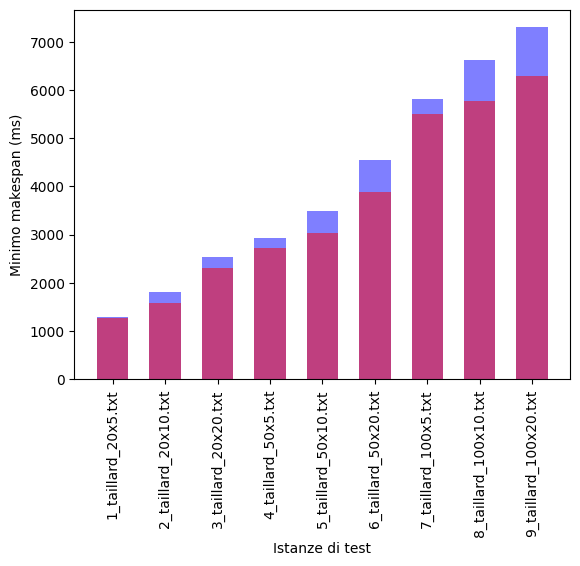

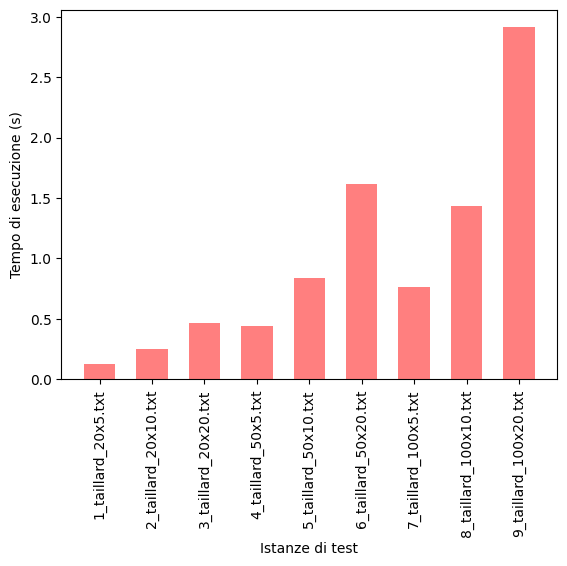

In [3]:
left_coordinates=[1,2,3,4,5,6,7,8,9]

bar_labels = []
heights = []
execution_times = []
upper_bounds = []
for result in results:
    bar_labels.append(result['instance_dim'])
    heights.append(result['result'])
    execution_times.append(result['execution_time'])
    upper_bounds.append(result['upper_bound'])
    
plt.bar(left_coordinates,heights,tick_label=bar_labels,width=0.6,color=['blue'], alpha=.5)
plt.bar(left_coordinates,upper_bounds,tick_label=bar_labels,width=0.6,color=['red'], alpha=.5)
plt.xlabel('Istanze di test')
plt.ylabel('Minimo makespan (ms)')
plt.xticks(rotation=90)
plt.show()

plt.bar(left_coordinates,execution_times,tick_label=bar_labels,width=0.6,color=['red'], alpha=.5)
plt.xlabel('Istanze di test')
plt.ylabel('Tempo di esecuzione (s)')
plt.xticks(rotation=90)
plt.show()

